In [1]:
import xarray as xr
import numpy as np
import glob

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy
cartopy.config['pre_existing_data_dir']  = '/home/ad/alberta/git/cartopy_data' 


In [2]:
phase='science_phase' # calval_phase or science_phase
simu='eNATL60-BLB002' # or eNATL60-BLBT02
data='karin' # or nadir

In [57]:
#parameters for the region to consider
reg='NANFL'
latmin=30
latmax=40
lonmin=-55
lonmax=-40


In [3]:
tdir='/work/ALT/swot/aval/wisa/tmp/inland_cleaning/swot_simulator_'+phase+'/'+simu+'-SSH-1h/'+data
files=glob.glob(tdir+'/*/*nc')

In [48]:
def lat_lon_data_nonan_debut(file):
    ds=xr.open_dataset(file)
    latfile=ds.latitude
    lonfile=ds.longitude
    ssh=ds.ssh_karin 
    isdata=np.where(np.isnan(ssh)==False)
    numlines_data=isdata[0]
    numlines_data_unique=np.unique(numlines_data)
    lat_nonan=[]
    lon_nonan=[]
    for k in np.arange(len(numlines_data_unique)):
        if len(isdata[0])>0:
            check=1
            lat_nonan.append(latfile[numlines_data_unique[k],0].values)
            if lonfile[numlines_data_unique[k],0].values > 180:
                lon_nonan.append(lonfile[numlines_data_unique[k],0].values-360)
            else:
                lon_nonan.append(lonfile[numlines_data_unique[k],0].values)
        else:
            check=0
    return check,lat_nonan,lon_nonan


In [17]:
f=0

In [49]:
    file=files[f]
    init=0
    check,lat_nonan,lon_nonan=lat_lon_data_nonan_debut(file)


In [19]:
print(check)

1


In [50]:
lon_nonan

[-43.90124500000002,
 -43.898589000000015,
 -43.89593400000001,
 -43.89327800000001,
 -43.890623000000005,
 -43.887967,
 -43.885310000000004,
 -43.882654,
 -43.879997,
 -43.877340000000004,
 -43.874683000000005,
 -43.87202500000001,
 -43.86936700000001,
 -43.866709000000014,
 -43.86406600000004,
 -43.861425,
 -43.858766,
 -43.85609800000003,
 -43.853429000000006,
 -43.850761000000034,
 -43.84809200000001,
 -43.84542300000004,
 -43.84275400000001,
 -43.84008399999999,
 -43.83741500000002,
 -43.834745,
 -43.832074000000034,
 -43.82940400000001,
 -43.82673299999999,
 -43.824062000000026,
 -43.821391000000006,
 -43.81871899999999,
 -43.81604800000002,
 -43.813376000000005,
 -43.81070299999999,
 -43.80803100000003,
 -43.80535800000001,
 -43.802685,
 -43.80001100000004,
 -43.797338000000025,
 -43.79466400000001,
 -43.79199,
 -43.78931499999999,
 -43.78664100000003,
 -43.78396600000002,
 -43.78129100000001,
 -43.778615,
 -43.77593999999999,
 -43.77326400000004,
 -43.770587000000035,
 -43.7679

In [21]:
print(file)

/work/ALT/swot/aval/wisa/tmp/inland_cleaning/swot_simulator_science_phase/eNATL60-BLB002-SSH-1h/karin/2010/SWOT_L2_LR_SSH_Basic_010_481_20100120T231859_20100121T001026_DG10_01.nc


In [26]:
nfile=file.split('/')[-1]
nnfile=nfile.split('.')[0]

In [27]:
print(nnfile)

SWOT_L2_LR_SSH_Basic_010_481_20100120T231859_20100121T001026_DG10_01


In [51]:
np.savez('/work/ALT/odatis/eNATL60/alberta/SWOT-sim/science_phase/latlon_debut_track_'+nnfile+'.npz',lat_nonan = lat_nonan,lon_nonan = lon_nonan)

In [52]:
spec = np.load('/work/ALT/odatis/eNATL60/alberta/SWOT-sim/science_phase/latlon_debut_track_'+nnfile+'.npz')
lat_read = spec['lat_nonan'];
lon_read = spec['lon_nonan'];

In [53]:
lon_read[0]

-43.90124500000002

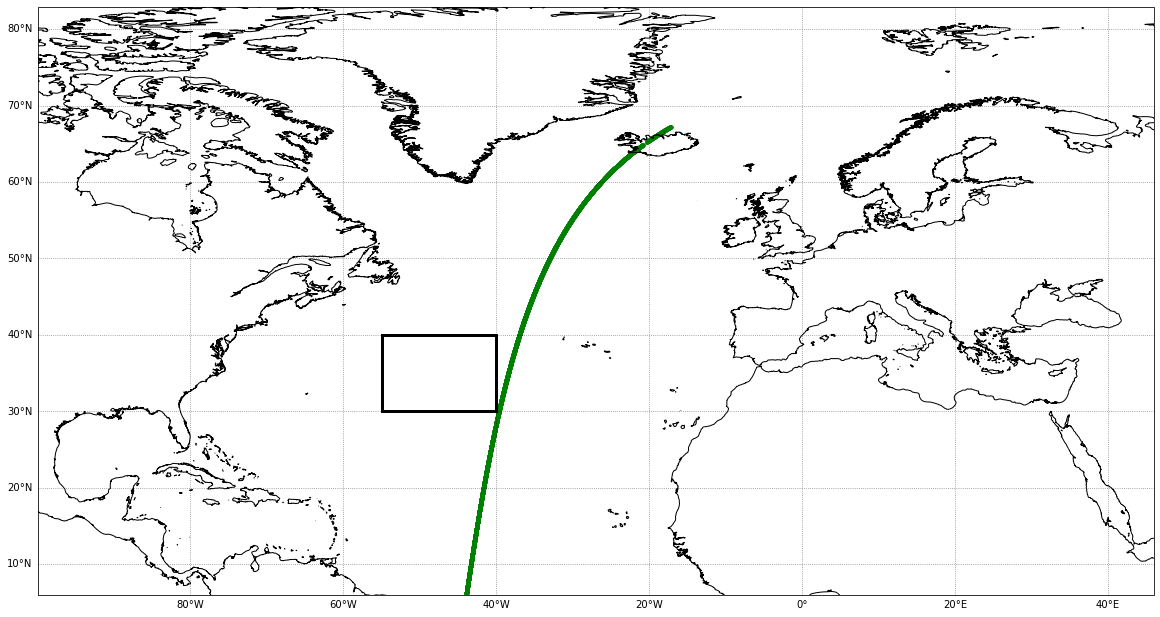

In [58]:
fig=plt.figure(figsize=(20,15))
ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent((-100, 46, 6, 67))
ax.coastlines(resolution="10m")
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

plt.scatter(lon_read,lat_read, c='g', linewidth=0, s=18);
ax.plot([lonmin, lonmin], [latmin, latmax],color='black',linewidth=3)
ax.plot([lonmax, lonmax], [latmin, latmax],color='black',linewidth=3)
ax.plot([lonmin, lonmax], [latmin, latmin],color='black',linewidth=3)
ax.plot([lonmin, lonmax], [latmax, latmax],color='black',linewidth=3)

In [45]:
print(lon_read[0]-360,lat_read[0])

-43.90124500000002 6.172530999999999


In [12]:
            with open('lat_lon_debut_track_swot_science_phase.txt', 'wb') as file:
                file.write([lat_nonan,lon_nonan])


TypeError: write() takes exactly one argument (2 given)

In [ ]:
for f in np.arange(len(files)):
    file=files[f]
    init=0
    check,lat_nonan,lon_nonan=lat_lon_data_nonan(file)
    if check == 1:
        if init == 0:
            with open('lat_lon_debut_track_swot_science_phase.txt', 'w') as file:
                file.write(lat_nonan,lon_nonan)
            init=1
        else:
             with open('lat_lon_debut_track_swot_science_phase.txt', 'a') as file:
                file.write(lat_nonan,lon_nonan)
           

In [ ]:

fig=plt.figure(figsize=(20,15))
ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent((-100, 46, 6, 67))
ax.coastlines(resolution="10m")
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

for f in np.arange(len(files)):
    file=files[f]
    lat_nonan,lon_nonan=lat_lon_data_nonan(file)
    plt.scatter(lon_nonan,lat_nonan, c='r', linewidth='0', s=18);

plt.savefig('map_debut_track_swot_science_phase.png')
    